<img src="../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

::: {.callout-important}
本文档具有一定的交互性，建议使用浏览器打开html文件，这样比pdf文件阅读体验更佳。
:::

## 第一题 {#sec-1}

题目如下

> Minsky与Papert指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或(XOR)。验证感知机为什么不能表示异或。

::: {.callout-note}
TL; DR 前面审题内容较长，学习了一些这道题的一些背景知识方便理解。
对于题目的证明，可以直接跳到解题部分@sec-proof。
:::

### 审题

- Minsky和Papert是谁？
  - 马文·明斯基（Marvin Lee Minsky）和西蒙·派珀特（Seymour Papert）是两位在人工智能领域具有重要影响力的科学家。
  - 

```{mermaid}
graph LR
    A[马文-明斯基]
    B[美国科学家]
    C[人工智能之父]
    D[专长于认知科学]
    E[与麦卡锡共同发起达特茅斯会议]
    F[提出人工智能概念]
    G[框架理论创立者]
    H[出生-1927年8月9日]
    I[逝世-2016年1月24日]
    J[西蒙-派珀特]
    K[美国麻省理工学院终身教授]
    L[教育信息化奠基人]
    M[数学家-计算机科学家-心理学家-教育家]
    N[近代人工智能领域先驱者之一]
    O[逝世-2016年7月31日]

    A---B
    A---C
    A---D
    A---E
    A---F
    A---G
    A---H
    A---I
    J---K
    J---L
    J---M
    J---N
    J---O


```

- 他们在什么时候，什么地方指出了上述观点？
  - 在1969年，Minsky和Papert发表了《Perceptrons》一书，探讨了单层感知器的局限性，特别是无法解决线性不可分问题，例如异或问题。 [@marvin1969perceptrons]。这本书从理论上否定了神经网络的研究价值，并对神经网络的发展产生了深远的影响。

::: {.callout-note}
Minsky和Papert的观点导致了神经网络研究进入低迷期。而实际上Minsky本人并没有看衰神经网络，只是他的书被人误解以为神经网络一无是处。实际上他写书的时候，MLP的训练算法已经出现了，但是他在书中没有提及[@人民邮电出版社_2020]。
:::

### 解题

#### 感知机是什么？感知机是线性模型吗？

根据李航课本内容[@LiHang_2019]，感知机是一种简单的线性二分类模型，由Rosenblatt在1957年提出。它的数学形式可以表示为：

$$ f(x) = sign(w \cdot x + b) 
$$ {#eq-perceptron}

在 [@eq-perceptron] 中，$w$ 和 $b$ 是模型参数，$x$ 是输入向量，$sign$ 是符号函数，$f(x)$ 是模型输出, f就是感知机。

$f(x)$ 本身当然不是一个线性函数，因为他输出的是一个决策。
我们换一个角度思考，我们有线性方程[@eq-linear]
$$  w \cdot x + b =0 
$$ {#eq-linear}
[@eq-linear]表示了输入空间中的一个超平面， $w$ 和 $b$ 是该超平面的法向量和截距。
这个超平面能把输入空间划分为两部分，分为正类和负类，称为分离超平面。
线性方程表示了超平面，所以我们说感知机是线性模型。




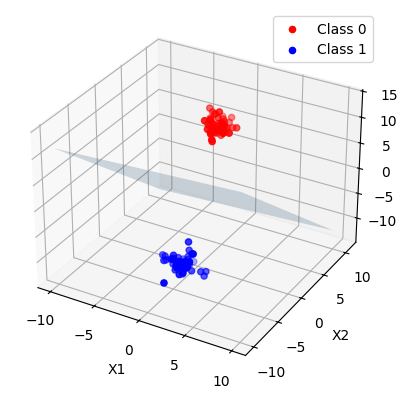

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
from mpl_toolkits.mplot3d import Axes3D

# 生成线性可分的数据集
X, y = make_blobs(n_samples=100, centers=2, n_features=3, random_state=42)

# 使用感知机模型进行学习
clf = Perceptron(random_state=42, max_iter=1000)
clf.fit(X, y)

# 获取感知机的权重和偏置
w = clf.coef_[0]
b = clf.intercept_[0]

# 创建一个3D图形来展示数据和感知机超平面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

# 计算超平面上的两个点用于绘制超平面
xx, yy = np.meshgrid(range(-10, 11), range(-10, 11))
zz = (-b - w[0] * xx - w[1] * yy) / w[2]

# 绘制感知机超平面
ax.plot_surface(xx, yy, zz, alpha=0.2)

# 设置图形属性
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

plt.show()


#### 异或函数是什么呢？

异或（XOR）是一个布尔函数，它返回两个输入值不同则为真（1），相同则为假（0）。
数理逻辑中分为模型论和证明论，我们从模型论的角度来说异或函数可以直接真值表表示如下：

| A                                                            | B    | XOR(A, B) |
| ------------------------------------------------------------ | ---- | --------- |
| 0                                                            | 0    | 0         |
| 0                                                            | 1    | 1         |
| 1                                                            | 0    | 1         |
| 1                                                            | 1    | 0         |

#### 异或函数和分类问题的关系？

这里我们在关注感知机能不能表示异或函数。所以我们要先把异或问题广义化为二分类问题，输入的A、B两个特征，原本AB的类型是bool，现在我们扩展一下认为异或的输入AB可以是任何实数。而原本输出的0和1正好对应正例和负例，感知机的$sign$也是输出0或者1，所以我们可以把异或问题转化为感知机的二分类问题。
其他实数上异或的结果仍然是0或者1，但是无论模型输出什么都认为是正确的就好。
我们可以可视化一下现在的异或问题


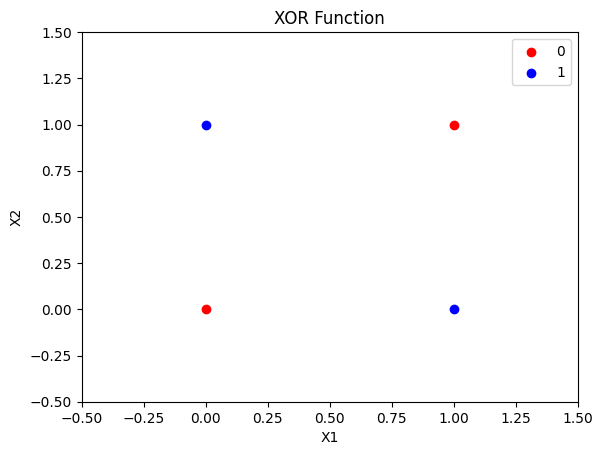

In [ ]:
# 绘制异或（XOR）函数的图像

# XOR函数的数据点
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制数据点
ax.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', label='0')
ax.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='1')

# 设置图形属性
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.set_title('XOR Function')

# 显示图形
plt.show()


#### 验证感知机为什么不能表示异或 {#sec-proof}

要验证感知机不能表示异或，我们需要证明：
> 不$\exists$一个$w$和$b$, 使得$f(x) = \text{sign}(w^Tx + b)$可以完美分离异或二分类问题的正负实例。

我们可以使用反证法来证明这个结论。
假设存在权重 $ w_1, w_2 $ 和偏置 $ b $ 可以表示异或函数，那么对于异或函数的每个输入组合，感知机的输出应该满足以下条件：

- $ w_1 \cdot 0 + w_2 \cdot 0 + b \leq 0 $ （对应于点（0,0），输出应为0，sign里面的值应该小于0）
- $ w_1 \cdot 0 + w_2 \cdot 1 + b > 0 $ （对应于点（0,1），输出应为+1）
- $ w_1 \cdot 1 + w_2 \cdot 0 + b > 0 $ （对应于点（1,0），输出应为+1）
- $ w_1 \cdot 1 + w_2 \cdot 1 + b \leq 0 $ （对应于点（1,1），输出应为0）

我们来化简一下这些不等式，我们使用sympy库来进行符号运算：

In [ ]:
import sympy as sp
from IPython.display import display, Latex

# 定义变量
w1, w2, b, x1, x2 = sp.symbols('w_1 w_2 b x_1 x_2')

# XOR函数的四个点
points = [(0, 0, -1), (0, 1, 1), (1, 0, 1), (1, 1, -1)]

# 建立不等式
inequalities = []
for x1_val, x2_val, y_val in points:
    # 感知机模型: sign(w1*x1 + w2*x2 + b)
    # 对于每个点，根据y_val的正负建立不等式
    if y_val > 0:
        inequalities.append(w1*x1_val + w2*x2_val + b > 0)
    else:
        inequalities.append(w1*x1_val + w2*x2_val + b <= 0)

# 化简不等式
simplified_inequalities = [sp.simplify(ineq) for ineq in inequalities]
# for ineq in simplified_inequalities:
#     # display(Latex(sp.latex(ineq)))
#     print(sp.latex(ineq))
simplified_inequalities

[b <= 0, b > -w_2, b > -w_1, b <= -w_1 - w_2]

我们进一步化简，观察b这个变量

In [ ]:
solutions = sp.solve(simplified_inequalities, b)
solutions

(-oo < b) & (b <= 0) & (b > -w_1) & (b > -w_2) & (b <= -w_1 - w_2)

而由于

In [ ]:
from sympy.logic.boolalg import simplify_logic
therom = (simplified_inequalities[0] & simplified_inequalities[1] & simplified_inequalities[2])>>(~simplified_inequalities[3])
therom

Implies((b <= 0) & (b > -w_1) & (b > -w_2), b > -w_1 - w_2)

与 $b \leq -w_1-w_2$ 矛盾，所以假设不成立，原命题成立，即感知机不能表示异或。

注意上面的逻辑表达式需要一定的推导，直接看是不一定能发现前3式和第4式的矛盾。
1. 首先发现$w_1, w_2 \geq 0$
2. 然后发现$w_1+b \gt 0$
3. 所以 $w_1+w_2+b \gt 0$
4. 所以矛盾。

因为人工观察不等式其实是启发式地去找矛盾，如果我们一开始不知道异或问题表达不了，我们可能一时看不出来这个问题。
我们可以使用人工智能的一个分支——逻辑智能体（Logical Agent）来进行自动定理发现，能够在形式系统中发现矛盾。


具体来说，我们要把问题转化为约束可满足问题，然后使用forward/backward chaining、DPLL等算法求解。

我们先试一下sympy的satisfiable函数，看看能不能求解出这个逻辑表达式。

In [ ]:
from sympy import symbols, And, Not, Implies
from sympy.logic.boolalg import to_cnf
from sympy.logic.inference import satisfiable
# 将表达式转换为 CNF
cnf_expr = to_cnf(And(*[Not(x) for x in simplified_inequalities]))

# 检查逻辑表达式的可满足性
result = satisfiable(cnf_expr)
print(result)  # 如果表达式不可满足，输出 False

{Q.gt(b, -w_1 - w_2): True, Q.le(b, -w_1): True, Q.le(b, -w_2): True, Q.gt(b, 0): True}


看来不行，我们换一个库[Z3 Theorem Prover][z3-solver]，它由Microsoft开发，可以处理多种逻辑，包括线性不等式。

首先要安装一下这个库，非常简单
```sh
$ pip install z3-solver
```

[z3-solver]: https://github.com/Z3Prover/z3

In [ ]:
#| hide
!pip install z3-solver

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
from z3 import *
set_param(proof=True)
ctx = Context()
s = Solver(ctx=ctx, logFile="log_theorem_prover.txt")
b, w_1, w_2 = Real('b', ctx=ctx), Real('w_1', ctx=ctx), Real('w_2', ctx=ctx)
s.add(b <= 0)  
s.add(b > -w_2)  
s.add(b > -w_1)  
s.add(b <= -w_1-w_2)
result = s.check()
if result == sat: # 三种可能，sat, unsat, unknown
    model = s.model()
    print(model[x])  # 打印出 x 的解
else:
    print(result)
    print("No solution")


unsat
No solution


In [ ]:
s.proof()

th-lemma(mp(mp(asserted(b > -w_2),
               trans(monotonicity(rewrite(-w_2 == -1*w_2),
                                  (b > -w_2) == (b > -1*w_2)),
                     rewrite((b > -1*w_2) ==
                             Not(b <= -1*w_2)),
                     (b > -w_2) == Not(b <= -1*w_2)),
               Not(b <= -1*w_2)),
            rewrite(Not(b <= -1*w_2) == Not(b + w_2 <= 0)),
            Not(b + w_2 <= 0)),
         mp(mp(asserted(b <= -w_1 - w_2),
               rewrite((b <= -w_1 - w_2) ==
                       (b <= -1*w_1 + -1*w_2)),
               b <= -1*w_1 + -1*w_2),
            rewrite((b <= -1*w_1 + -1*w_2) ==
                    (b + w_1 + w_2 <= 0)),
            b + w_1 + w_2 <= 0),
         asserted(b <= 0),
         mp(mp(asserted(b > -w_1),
               trans(monotonicity(rewrite(-w_1 == -1*w_1),
                                  (b > -w_1) == (b > -1*w_1)),
                     rewrite((b > -1*w_1) ==
                             Not(b <= -1*w_1)),
                     (b > -w_1) == Not(b <= -1*w_1)),
               Not(b <= -1*w_1)),
            rewrite(Not(b <= -1*w_1) == Not(b + w_1 <= 0)),
            Not(b + w_1 <= 0)),
         False)

In [ ]:
# s.proof()
s.unsat_core()

[]

我们可以看到中间的过程

In [ ]:
with open('log_theorem_prover.txt', 'r') as f:
    content = f.read()
    print(content)

(declare-fun b () Real)
(assert (<= b 0.0))
(declare-fun w_2 () Real)
(assert (> b (- w_2)))
(declare-fun w_1 () Real)
(assert (> b (- w_1)))
(assert (<= b (- (- w_1) w_2)))
(check-sat)



### 题目扩展问题

#### 异或的“高级版”：奇偶校验问题 Parity Check 

刚才我们只说明了2维情况下感知机有局限性，现在假如我们是当年的Minsky和Papert，我们想要说明更高维度上线性不可分函数有多重要，
而感知机无法解决，我们就能崭露头角，告诉大家神经网络不行。
那么，我们就来看看异或的“高级版”：奇偶校验 Parity Check，这个问题非常重要，比如在早期的神经架构搜索研究中会经常使用[@Yao_Liu_1997]。
奇偶校验问题的定义是根据被传输的一组二进制代码中“1”的个数是奇数或偶数来进行校验的一种方法。奇偶校验问题本质上是一个非线性问题，因为它涉及到对二进制数据中“1”的个数进行奇偶判断，这超出了感知机模型的线性决策边界能力。

刚才我们一个个地去看不等式推导矛盾，很低效，现在我们引入线性代数的视角去看待这个问题。
我们要说明的问题其实是， 对于
$$
Ax \leq b
$$ 
其中 $A$ 是一个 $m \times n$ 的矩阵，$x$ 是一个 $n \times 1$ 的向量，$b$ 是一个 $m \times 1$ 的向量。这个不等式组表示的是 $x$ 需要满足的所有线性不等式条件。
在$A$和$b$满足什么条件的时候不等式不可能成立，而Parity check是否满足这个条件呢？

实际上，这是简单版的线性规划问题，可以使用单纯形法来求解。

## 第二题 {#sec-2}

题目如下

> 利用课本例题3.2构造的kd树求点$x=(3,4.5)^{T}$ 的最近邻点。

### 审题
例题3.2的内容如下
> 给定二维空间的数据集T，构造一个平衡kd树，并给出其构造过程。

In [ ]:
import numpy as np
T = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2],
])
T


array([[2, 3],
       [5, 4],
       [9, 6],
       [4, 7],
       [8, 1],
       [7, 2]])

我们使用代码来表示一下构造的过程，并且可视化出来分界线。
首先我们要定义节点类，并且写一个验证函数，维持KD树的性质。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

# 定义KD树的节点类和构建函数
class Node:
    # 一个简单的二叉树
    def __init__(self, point:np.ndarray, # 点的坐标，是k维向量
                 left:'Node'=None, # 左子树
                 right:'Node'=None, # 右子树
                 axis:int=None # 划分的轴
                 ):
        # 维持的性质：在axis这个轴上，左子树的点坐标都小于等于point，右子树的点坐标都大于等于point
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
    def validate(self):
        # 检验性质：左子树的点坐标都小于等于point，右子树的点坐标都大于等于point
        if self.left is not None:
            if not self.left.point[self.axis] <= self.point[self.axis]:
                return False
        if self.right is not None:
            if not self.right.point[self.axis] >= self.point[self.axis]:
                return False
        return True
Node

__main__.Node

我们直接使用递归的方式来构建KD树

我在构建第0层的KD树， 我需要处理的数据量是6。我对第0维进行划分，在7处分割。
	我在构建第1层的KD树， 我需要处理的数据量是3。我对第1维进行划分，在4处分割。
		我在构建第2层的KD树， 我需要处理的数据量是1。我对第0维进行划分，在2处分割。
		我在构建第2层的KD树， 我需要处理的数据量是1。我对第0维进行划分，在4处分割。
	我在构建第1层的KD树， 我需要处理的数据量是2。我对第1维进行划分，在6处分割。
		我在构建第2层的KD树， 我需要处理的数据量是1。我对第0维进行划分，在8处分割。


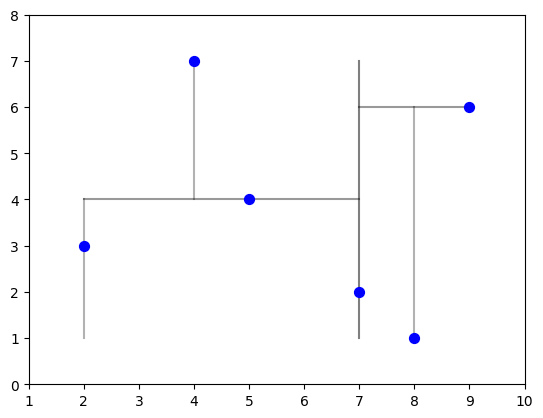

In [ ]:
def build_kdtree(points, depth=0):
    if not points:
        return None

    k = len(points[0])  # 假设所有点都有相同的维度
    axis = depth % k # 轮着划分轴

    points.sort(key=lambda x: x[axis])
    median = len(points) // 2
    print("\t"*depth+f"我在构建第{depth}层的KD树， 我需要处理的数据量是{len(points)}。我对第{axis}维进行划分，在{points[median][axis]}处分割。")

    node = Node(
        point=points[median],
        left=build_kdtree(points[:median], depth + 1),
        right=build_kdtree(points[median + 1:], depth + 1),
        axis=axis
    )
    return node

# 定义可视化函数
def draw_kdtree(ax, node, depth, min_x, max_x, min_y, max_y, more=0.1):
    if node is None:
        return

    # 绘制分割线
    if node.axis == 0:  # x轴分割
        ax.plot([node.point[node.axis], node.point[node.axis]], [min_y, max_y], color='black', alpha=0.5 - 0.1 * depth)
        draw_kdtree(ax, node.left, depth + 1, min_x, node.point[node.axis], min_y, max_y)
        draw_kdtree(ax, node.right, depth + 1, node.point[node.axis], max_x, min_y, max_y)
    else:  # y轴分割
        ax.plot([min_x, max_x], [node.point[node.axis], node.point[node.axis]], color='black', alpha=0.5 - 0.1 * depth)
        draw_kdtree(ax, node.left, depth + 1, min_x, max_x, min_y, node.point[node.axis])
        draw_kdtree(ax, node.right, depth + 1, min_x, max_x, node.point[node.axis], max_y)
    # 设置绘图限制
    if depth == 0:
        ax.set_xlim(min_x - more, max_x + more)
        ax.set_ylim(min_y - more, max_y + more)
        
# 数据准备
points = T

# 构建KD树
root = build_kdtree(points.tolist())

# 可视化KD树
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], color='blue', zorder=10, s=50)

# 绘制KD树的分割线
draw_kdtree(ax, root, 0, np.min(points[:, 0]), np.max(points[:, 0]), np.min(points[:, 1]), np.max(points[:, 1]), more = 1)


#### 解题

例题已经告诉我们KD树的建立过程，现在本题我们来学习一下KD树的搜索是怎么做的。


In [ ]:
x = np.array([3, 4.5])
x

array([3. , 4.5])

Text(3.0, 4.5, '(3.0, 4.5)')

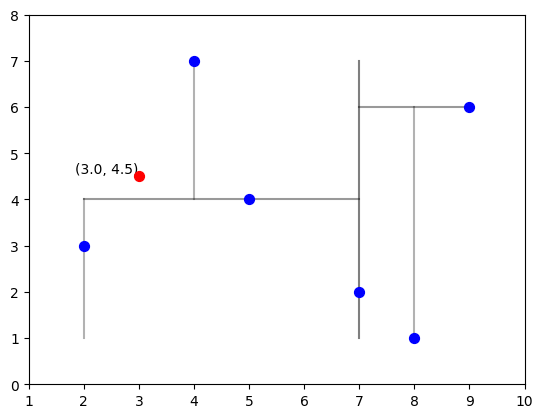

In [ ]:
# 可视化KD树
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], color='blue', zorder=10, s=50)

# 绘制KD树的分割线
draw_kdtree(ax, root, 0, np.min(points[:, 0]), np.max(points[:, 0]), np.min(points[:, 1]), np.max(points[:, 1]), more = 1)
ax.scatter(x[0], x[1], color='red', zorder=10, s=50)
ax.text(x[0], x[1], f'({x[0]}, {x[1]})', verticalalignment='bottom', horizontalalignment='right')

李航书上的KD树的搜索算法我理解如下：

- 首先我们肯定能快速找到目标点所在的最小超矩形区域。这一步就是二叉搜索树，我们按照axis去分割。
- 刚才那个区域的那个点认为是目前最近的点。
- 我们再考虑那个点的父节点，这个父节点有两个子树，一个是刚才的刚才的目前最近点。
  - 这个父节点和当前最近点可以比较，如果更近可以替代掉。
  - 检查另一个子树的时候很复杂，需要看球是否相交。


实际上我们有更好理解的思路，书上讲了球的相交非常复杂，实际上没那么难。

- 我们本来的目标是遍历整个树，找到所有点里面和目标点最小的。
- 现在我们本来可以从root开始递归所有节点，通过先序遍历之类的方法来找到所有点。
- 然后我们就发现，左子树和右子树，有一个子树整体来说是更加有希望的，那就是被划分点划分到左边还是右边。
- 所以我们优先考虑被搜索点被划分的那个子树，然后再考虑另一个子树。
- 父树的最短距离就是左子树的最短距离和右子树的最短距离的最小值。如果我们发现第一次查看的子树的最短距离已经比当前坐标轴上的最短距离要小，我们偶尔就可以跳过这个子树，从而提高效率。

这个思路和书上的是等价的。
我们据此写Python代码

In [ ]:
# 定义最近邻点搜索函数
def find_nearest_neighbor(node, point, depth=0, best=None):
    if node is None:
        return best

    # 初始化最佳点
    if best is None:
        best = node.point, float('inf')
    # 计算当前点到查询点的距离
    dist = np.linalg.norm(np.array(point) - np.array(node.point))
    if dist < best[1]:
        best = (node.point, dist)

    # 确定分割轴
    axis = depth % 2
    
    log = "\t"*depth+f"我在第{depth}层，我现在在{node.point}，对比我现在的位置之后，我目前发现最好的点是{best[0]}，距离是{best[1]:.2f}。"
    # 沿着正确的子树进行搜索
    next_branch = None
    opposite_branch = None
    if point[axis] < node.point[axis]:
        next_branch = node.left
        opposite_branch = node.right
        log += f"我觉得左子树更有希望, 因为在{axis}维度上，我们被划分到左边了。"
    else:
        next_branch = node.right
        opposite_branch = node.left
        log += f"我觉得右子树更有希望, 因为在{axis}维度上，我们被划分到右边了。"
        
    print(log)
          
    # 递归搜索
    best = find_nearest_neighbor(next_branch, point, depth + 1, best)
    print("\t"*depth+f"我在第{depth}层，我现在在{node.point}，对比第一个子树之后，我目前发现最好的点是{best[0]}，距离是{best[1]:.2f}")

    # 如果分割线与查询点的距离小于最佳距离，则搜索另一边的子树
    if abs(point[axis] - node.point[axis]) < best[1]:
        best = find_nearest_neighbor(opposite_branch, point, depth + 1, best)
        print("\t"*depth+f"我在第{depth}层，我现在在{node.point}，对比第二个子树之后，我目前发现最好的点是{best[0]}，距离是{best[1]:.2f}")
    else:
        print(f"另一边的子树在现在这个维度{axis}上的距离{abs(point[axis] - node.point[axis])}大于最佳距离{best[1]:.2f}，我不用继续搜索。")

    return best



# 找到点 (3, 4.5) 的最近邻点
input_point = [3, 4.5]
nearest_point, distance = find_nearest_neighbor(root, input_point)
nearest_point

我在第0层，我现在在[7, 2]，对比我现在的位置之后，我目前发现最好的点是[7, 2]，距离是4.72。我觉得左子树更有希望, 因为在0维度上，我们被划分到左边了。
	我在第1层，我现在在[5, 4]，对比我现在的位置之后，我目前发现最好的点是[5, 4]，距离是2.06。我觉得右子树更有希望, 因为在1维度上，我们被划分到右边了。
		我在第2层，我现在在[4, 7]，对比我现在的位置之后，我目前发现最好的点是[5, 4]，距离是2.06。我觉得左子树更有希望, 因为在0维度上，我们被划分到左边了。
		我在第2层，我现在在[4, 7]，对比第一个子树之后，我目前发现最好的点是[5, 4]，距离是2.06
		我在第2层，我现在在[4, 7]，对比第二个子树之后，我目前发现最好的点是[5, 4]，距离是2.06
	我在第1层，我现在在[5, 4]，对比第一个子树之后，我目前发现最好的点是[5, 4]，距离是2.06
		我在第2层，我现在在[2, 3]，对比我现在的位置之后，我目前发现最好的点是[2, 3]，距离是1.80。我觉得右子树更有希望, 因为在0维度上，我们被划分到右边了。
		我在第2层，我现在在[2, 3]，对比第一个子树之后，我目前发现最好的点是[2, 3]，距离是1.80
		我在第2层，我现在在[2, 3]，对比第二个子树之后，我目前发现最好的点是[2, 3]，距离是1.80
	我在第1层，我现在在[5, 4]，对比第二个子树之后，我目前发现最好的点是[2, 3]，距离是1.80
我在第0层，我现在在[7, 2]，对比第一个子树之后，我目前发现最好的点是[2, 3]，距离是1.80
另一边的子树在现在这个维度0上的距离4大于最佳距离1.80，我不用继续搜索。


[2, 3]

上述算法的流程图如下：
```{mermaid}
graph TD
    A[开始] --> B[检查node是否为None]
    B -->|是| C[返回best]
    B -->|否| D[初始化best]
    D --> E[计算dist]
    E --> F[更新best]
    F --> G[确定分割轴axis]
    G --> H[判断搜索方向]
    H -->|左子树| I[递归搜索左子树]
    H -->|右子树| J[递归搜索右子树]
    I --> K[检查是否需要搜索另一边子树]
    J --> K
    K -->|需要| L[递归搜索另一边子树]
    K -->|不需要| M[结束递归]
    L --> M
    M --> N[返回best]
    N --> C

    style A fill:#bbf,stroke:#f66,stroke-width:2px
    style C fill:#bbf,stroke:#f66,stroke-width:2px
    style N fill:#bbf,stroke:#f66,stroke-width:2px

```

### 题目扩展问题

#### 在K=1时，KD树和红黑树、AVL树等平衡搜索树的关系是什么?

关系在于KD树没有考虑新增加节点的算法复杂度，每次新增加节点都要重新构造。
KD树建树的时候直接算中位数，强行平衡。

#### 怎么证明刚才的过程就找到了最近邻点？

#### 刚才我们只找到了最近邻点，如果需要返回q个最近邻点，应该如何修改代码？

#### KD树构建过程、搜索过程的平均算法复杂度、最坏情况算法复杂度分别都是多少？

平均复杂度
搜索是O(logN)， N是点的数量[@LiHang_2019]。


#### 目前前沿的向量数据库中实际上做KNN是用什么数据结构？支持GPU加速吗？


目前前沿的向量数据库中，实际上做KNN（K-Nearest Neighbor，最近邻搜索）通常使用的数据结构除了KD-Tree，还有HNSW（Hierarchical Navigable Small World）
以及 Ball Tree、
FLANN、局部敏感哈希（LSH）。

NVIDIA cuVS库用于GPU加速的向量搜索和聚类，使用CAGRA（CUDA-Accelerated Graph Index for Vector Retrieval）技术。
